# Race Review: Covid Petit Prix 2

This is a general page that will display info about a race day.

In [1]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart as ch
import utils
import numpy as np

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

2020-10-28 21:50:51,914|INFO|read_metadata| Read 93 records.
2020-10-28 21:50:51,914|INFO|read_logs| Reading file 2020-10-25_10:45.pd.gz
2020-10-28 21:50:52,630|INFO|read_log_file| Session from 2020-10-25 17:45:11.040000, 125668 rows, 3.4905555555555554 hours.
2020-10-28 21:50:54,016|INFO|read_logs| Found 125667 records before trim.
2020-10-28 21:50:54,041|INFO|read_logs| Trimming to 0 -1


<IPython.core.display.Javascript object>


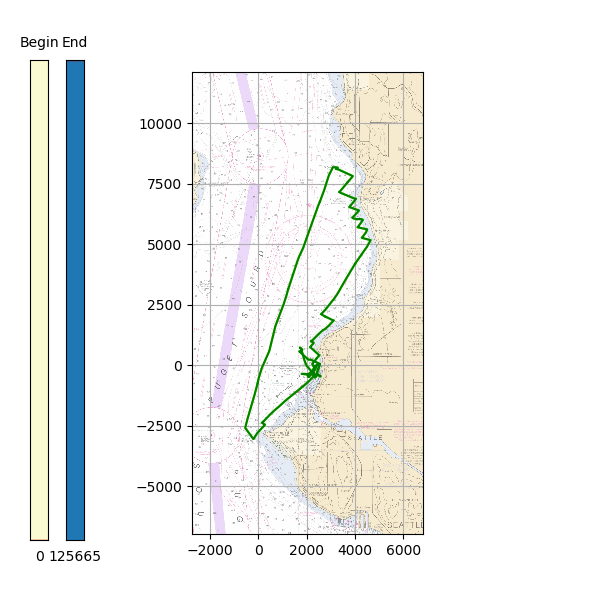

In [2]:
date = '2020-10-25'
df, race = race_logs.read_date(date) # race_trim=False)
chart = ch.trim_track(df)

In [3]:
if chart.is_trimmed:
    display("Updating Trim!")
    race_logs.trim_race(race, chart.begin, chart.end)

In [5]:
rudder, rrr = p.exponential_filter(np.array(df.rudder), 0.9, 4)
spd, rrr = p.exponential_filter(np.array(df.spd), 0.999, 2)
awa, rrr = p.exponential_filter_angle(np.array(df.awa), 0.999, 10)
df['vmg'] = np.cos(np.radians(df.twa)) * df.spd

<IPython.core.display.Javascript object>


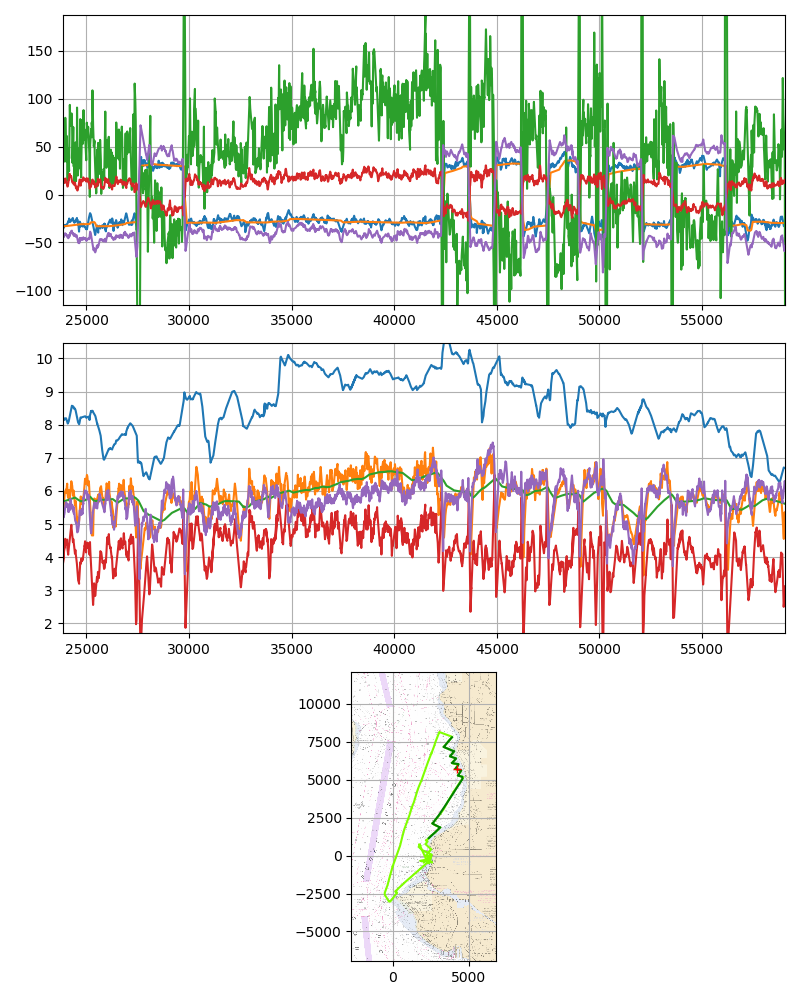

In [8]:
ccc = ch.chart_and_plot(df, None, (df.awa, awa, rudder*10, df.zg100_roll+3.5, df.twa), (df.tws*1.944, df.spd*1.944, spd*1.944, df.vmg*1.944, df.sog*1.944))

In [28]:
sdf = df.iloc[ccc.begin:ccc.end]
sdf.vmg.mean()*1.944, sdf.spd.mean()*1.944

(4.579463657762376, 5.726477197493078)

In [34]:
heel = sdf.zg100_roll+3.5
heel[heel > 0].mean()

29.662487708947886

In [9]:
df.iloc[37510].row_times

Timestamp('2020-10-25 11:47:42.041694615-0700', tz='US/Pacific')